## Import Libraries and load Data

In [857]:
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib
from matplotlib import colors
from matplotlib import pyplot
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn import cluster
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import silhouette_score
import warnings
import sys
import pickle
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer

In [858]:
df = pd.read_csv("marketing_campaign.csv", sep = '\t')

## Data Cleaning

### drop missing values 

In [859]:
df.dropna(inplace=True)

In [860]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


### convert all columns to lowercase

In [861]:
df.columns= df.columns.str.lower()

### drop unnecessary columns

In [862]:
df = df.drop(columns=["id", "z_costcontact","z_revenue"])

### create new column "age"

In [863]:
df["age"] = 2014 - df["year_birth"]

In [864]:
df["age"]

0       57
1       60
2       49
3       30
4       33
        ..
2235    47
2236    68
2237    33
2238    58
2239    60
Name: age, Length: 2216, dtype: int64

In [865]:
#drop "year_birth"
df = df.drop(columns=["year_birth"])

### remove outliers in "age" column

In [866]:
max(df["age"])

121

/opt/anaconda3/envs/DA_ENV/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

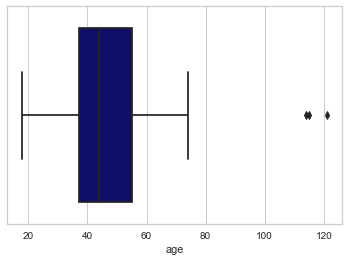

In [867]:
sns.boxplot(df["age"])

In [868]:
df.loc[df['age'] == 121]

,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,mntfruits,mntmeatproducts,...,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,response,age
239,2n Cycle,Single,60182.0,0,1,17-05-2014,23,8,0,5,...,2,4,0,0,0,0,0,0,0,121


In [869]:
df.drop([239], axis=0, inplace=True)

In [870]:
max(df["age"])

115

In [871]:
df.loc[df['age'] == 115]

,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,mntfruits,mntmeatproducts,...,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,response,age
339,PhD,Together,83532.0,0,0,26-09-2013,36,755,144,562,...,4,1,0,0,1,0,0,0,0,115


In [872]:
df.drop([339], axis=0, inplace=True)

In [873]:
max(df["age"])

114

In [874]:
df.loc[df['age'] == 114]

,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,mntfruits,mntmeatproducts,...,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,response,age
192,2n Cycle,Divorced,36640.0,1,0,26-09-2013,99,15,6,8,...,2,5,0,0,0,0,0,1,0,114


In [875]:
df.drop([192], axis=0, inplace=True)

In [876]:
max(df["age"])

74

### convert "dt_customer" to datetime

In [877]:
type(df["dt_customer"][0])

str

In [878]:
df["dt_customer"] = pd.to_datetime(df["dt_customer"], format="%d-%m-%Y")

### create "cust_since" column + drop "dt_customer"

In [879]:
#Convert datetime column/series to month
df['cust_since'] = df['dt_customer'].dt.month

In [880]:
df['cust_since']

0        9
1        3
2        8
3        2
4        1
        ..
2235     6
2236     6
2237     1
2238     1
2239    10
Name: cust_since, Length: 2213, dtype: int64

In [881]:
df["cust_since"] = (max(df["dt_customer"]) - df["dt_customer"]).astype('timedelta64[M]')

In [882]:
df["cust_since"] = df["cust_since"].astype("Int64")

In [883]:
df[["cust_since", "dt_customer"]]

,cust_since,dt_customer
0,21,2012-09-04
1,3,2014-03-08
2,10,2013-08-21
3,4,2014-02-10
4,5,2014-01-19
...,...,...
2235,12,2013-06-13
2236,0,2014-06-10
2237,5,2014-01-25
2238,5,2014-01-24


In [884]:
df.drop(["dt_customer"],axis=1, inplace=True)

### clean education column

In [885]:
df["education"].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [886]:
def clean_edu(x):
    if x in ['Basic', '2n Cycle']:
        return "0"
    elif x in ['Graduation']:
        return "1"
    elif x in ['Master', 'PhD']:
        return "2"

In [887]:
df['education'] = list(map(clean_edu, df['education']))

In [888]:
df['education'] = df['education'].astype(int)

### convert "income" to int

In [889]:
max(df["income"])

666666.0

In [890]:
df.loc[df['income'] == 666666.0]

,education,marital_status,income,kidhome,teenhome,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,...,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,response,age,cust_since
2233,1,Together,666666.0,1,0,23,9,14,18,8,...,6,0,0,0,0,0,0,0,37,12


In [891]:
df.drop([2233], axis=0, inplace=True)

In [892]:
df["income"] = df["income"].astype("Int64")

### clean "marital_status"

In [893]:
df["marital_status"].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [894]:
df.loc[df['marital_status'] == "YOLO"]

,education,marital_status,income,kidhome,teenhome,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,...,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,response,age,cust_since
2177,2,YOLO,48432,0,1,3,322,3,50,4,...,8,0,0,0,0,0,0,0,41,20
2202,2,YOLO,48432,0,1,3,322,3,50,4,...,8,0,0,0,0,0,0,1,41,20


In [895]:
#remove "YOLO" from "marital_status"
df = df.drop([2177, 2202])

In [896]:
df["marital_status"].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd'], dtype=object)

In [897]:
def clean_marital(x):
    if x in ['Together', 'Married']:
        return "1"
    elif x in ["Single", "Alone", "Widow", "Divorced", 'Absurd']:
        return "0"

In [898]:
df['marital_status'] = list(map(clean_marital, df['marital_status']))

In [899]:
df['marital_status'] = df['marital_status'].astype(int)

### new column "children"

In [900]:
df["children"]= df["kidhome"] + df["teenhome"]

### concatenate campaigns 

In [901]:
df["acc_camp"] = df["acceptedcmp1"] + df["acceptedcmp2"] + df["acceptedcmp3"] + df["acceptedcmp4"] + df["acceptedcmp5"]

In [902]:
df["acc_camp"].value_counts()

0    1752
1     322
2      81
3      44
4      11
Name: acc_camp, dtype: int64

In [903]:
df = df.drop(columns=["acceptedcmp1", "acceptedcmp2","acceptedcmp3", "acceptedcmp4", "acceptedcmp5" ])

### creating household size column

In [904]:
df.dtypes

education              int64
marital_status         int64
income                 Int64
kidhome                int64
teenhome               int64
recency                int64
mntwines               int64
mntfruits              int64
mntmeatproducts        int64
mntfishproducts        int64
mntsweetproducts       int64
mntgoldprods           int64
numdealspurchases      int64
numwebpurchases        int64
numcatalogpurchases    int64
numstorepurchases      int64
numwebvisitsmonth      int64
complain               int64
response               int64
age                    int64
cust_since             Int64
children               int64
acc_camp               int64
dtype: object

In [905]:
df["household_size"] = df["marital_status"] + df["children"] + 1

In [906]:
df.drop(["children"], axis=1, inplace=True)

### exclude complainers

In [907]:
df["complain"].value_counts()

0    2190
1      20
Name: complain, dtype: int64

In [908]:
df.drop(["complain"], axis=1, inplace=True)

## Creating a General Overview to spot Patterns

### Correlation Heatmap

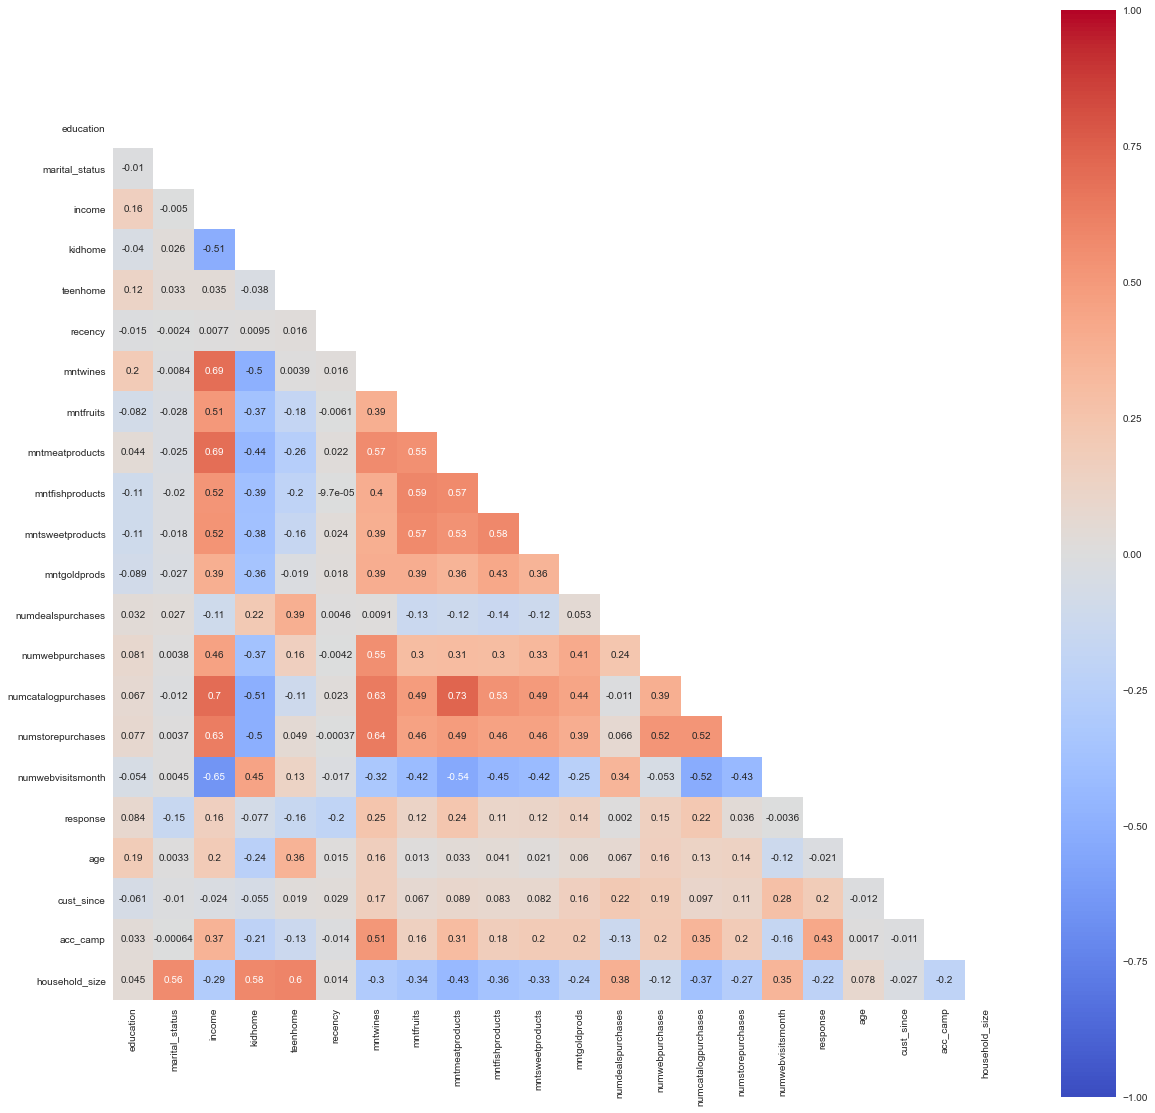

In [909]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(20, 20))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

In [910]:
c = abs(df.corr())
c_last = c['income'].sort_values(ascending=False)
c_thr = .3
cols_to_keep = list(c_last[c_last > c_thr].index)[1:] + [list(c_last[c_last > c_thr].index)[0]]
print(cols_to_keep)

df[cols_to_keep]

['numcatalogpurchases', 'mntmeatproducts', 'mntwines', 'numwebvisitsmonth', 'numstorepurchases', 'mntsweetproducts', 'mntfishproducts', 'kidhome', 'mntfruits', 'numwebpurchases', 'mntgoldprods', 'acc_camp', 'income']


,numcatalogpurchases,mntmeatproducts,mntwines,numwebvisitsmonth,numstorepurchases,mntsweetproducts,mntfishproducts,kidhome,mntfruits,numwebpurchases,mntgoldprods,acc_camp,income
0,10,546,635,7,4,88,172,0,88,8,88,0,58138
1,1,6,11,5,2,1,2,1,1,1,6,0,46344
2,2,127,426,4,10,21,111,0,49,8,42,0,71613
3,0,20,11,6,4,3,10,1,4,2,5,0,26646
4,3,118,173,5,6,27,46,1,43,5,15,0,58293
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,3,182,709,5,4,118,42,0,43,9,247,0,61223
2236,2,30,406,7,5,0,0,2,0,8,8,1,64014
2237,3,217,908,6,13,12,32,0,48,2,24,1,56981
2238,5,214,428,3,10,30,80,0,30,6,61,0,69245


In [911]:
df.describe()

,education,marital_status,income,kidhome,teenhome,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,...,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,response,age,cust_since,acc_camp,household_size
count,2210.000000,2210.000000,2210.000000,2210.000000,2210.000000,2210.000000,2210.000000,2210.000000,2210.000000,2210.000000,...,2210.000000,2210.000000,2210.000000,2210.000000,2210.000000,2210.000000,2210.000000,2210.000000,2210.000000,2210.000000
mean,1.267421,0.646154,51962.002262,0.442081,0.505430,49.061086,305.272398,26.350679,167.135747,37.679186,...,2.322172,4.085520,2.673756,5.806335,5.319005,0.150226,45.090045,11.113122,0.298643,2.593665
std,0.651270,0.478270,21536.760214,0.537033,0.544296,28.923063,337.475234,39.755837,224.328327,54.787459,...,1.923693,2.742027,2.928434,3.252405,2.425355,0.357374,11.706248,6.633718,0.679818,0.906471
min,0.000000,0.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000,0.000000,1.000000
25%,1.000000,0.000000,35208.500000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,37.000000,5.000000,0.000000,2.000000
50%,1.000000,1.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,...,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,44.000000,11.000000,0.000000,3.000000
75%,2.000000,1.000000,68487.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.750000,50.000000,...,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,55.000000,17.000000,0.000000,3.000000
max,2.000000,1.000000,162397.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,74.000000,22.000000,4.000000,5.000000


### Histograms

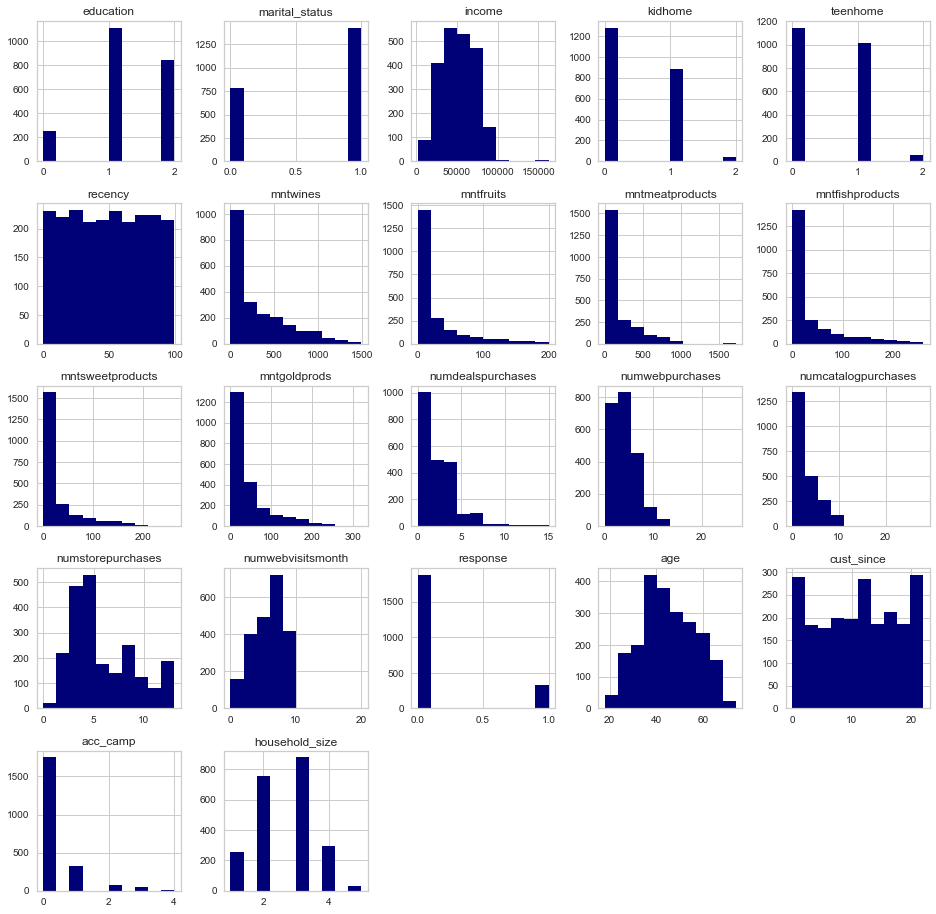

In [912]:
df.hist(figsize=(16,16))
plt.show()

## Preprocessing for Modeling

### Encode Categorical Features

In [913]:
df["marital_status"]=pd.get_dummies(df["marital_status"], drop_first=True)

In [914]:
df["marital_status"]

0       0
1       0
2       1
3       1
4       1
       ..
2235    1
2236    1
2237    0
2238    1
2239    1
Name: marital_status, Length: 2210, dtype: uint8

### Standard Scaler

In [915]:
scaler = StandardScaler()
scaler.fit(df)
df_scaled = scaler.transform(df)
df_scaled_df = pd.DataFrame(df_scaled, columns = df.columns)
display(df.head())
print()
display(df_scaled_df.head())

,education,marital_status,income,kidhome,teenhome,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,...,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,response,age,cust_since,acc_camp,household_size
0,1,0,58138,0,0,58,635,88,546,172,...,3,8,10,4,7,1,57,21,0,1
1,1,0,46344,1,1,38,11,1,6,2,...,2,1,1,2,5,0,60,3,0,3
2,1,1,71613,0,0,26,426,49,127,111,...,1,8,2,10,4,0,49,10,0,2
3,1,1,26646,1,0,26,11,4,20,10,...,2,2,0,4,6,0,30,4,0,3
4,2,1,58293,1,0,94,173,43,118,46,...,5,5,3,6,5,0,33,5,0,3


,education,marital_status,income,kidhome,teenhome,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,...,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,response,age,cust_since,acc_camp,household_size
0,-0.410707,-1.351328,0.286830,-0.823378,-0.928803,0.309128,0.977263,1.551050,1.689265,2.452226,...,0.352437,1.427909,2.502328,-0.555510,0.693249,2.378366,1.017632,1.490735,-0.439397,-1.758497
1,-0.410707,-1.351328,-0.260915,1.039125,0.908847,-0.382518,-0.872180,-0.637804,-0.718466,-0.651376,...,-0.167514,-1.125524,-0.571683,-1.170579,-0.131559,-0.420457,1.273963,-1.223290,-0.439397,0.448362
2,-0.410707,0.740013,0.912646,-0.823378,-0.928803,-0.797506,0.357819,0.569840,-0.178956,1.338580,...,-0.687465,1.427909,-0.230126,1.289696,-0.543963,-0.420457,0.334081,-0.167836,-0.439397,-0.655068
3,-0.410707,0.740013,-1.175745,1.039125,-0.928803,-0.797506,-0.872180,-0.562326,-0.656043,-0.505325,...,-0.167514,-0.760748,-0.913239,-0.555510,0.280845,-0.420457,-1.289351,-1.072511,-0.439397,0.448362
4,1.125101,0.740013,0.294029,1.039125,-0.928803,1.554091,-0.392036,0.418884,-0.219085,0.151909,...,1.392340,0.333580,0.111431,0.059559,-0.131559,-0.420457,-1.033019,-0.921731,-0.439397,0.448362


## Clustering using K-Means

### Generate Model ("kmeans3")

In [916]:
kmeans3 = KMeans(n_clusters=5, init="k-means++", random_state=1234)
kmeans3.fit(df_scaled_df)

KMeans(n_clusters=5, random_state=1234)

In [917]:
kmeans3.labels_

array([3, 4, 3, ..., 3, 1, 4], dtype=int32)

### Save model with pickle

In [918]:
import pickle
#model = KMeans()
with open("Model/kmeans3.pickle", "wb") as f:
    pickle.dump(kmeans3,f)

In [919]:
def load(filename = "filename.pickle"): 
    try: 
        with open(filename, "rb") as f: 
            return pickle.load(f) 
        
    except FileNotFoundError: 
        print("File not found!") 

### K-Means Scatterplot Example

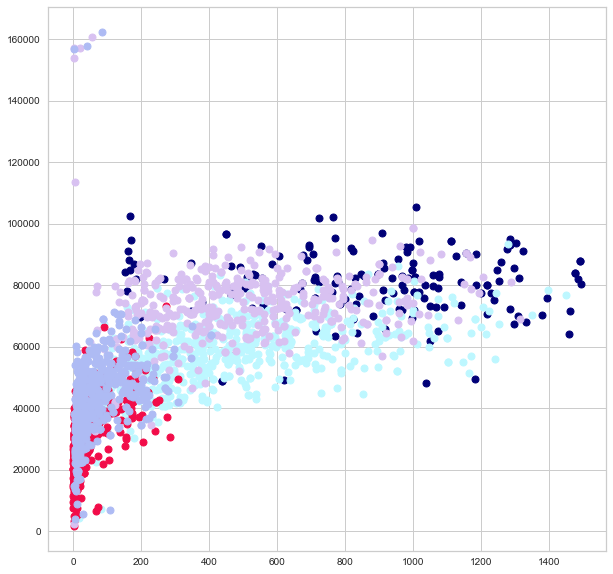

In [920]:
# assign a cluster to each example
labels = kmeans3.predict(df_scaled_df)
# retrieve unique clusters
clusters = np.unique(labels)
plt.figure(figsize=(10, 10))
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(labels == cluster)
    # create scatter of these samples (2="income", 6="mntwine")
    pyplot.scatter(df.to_numpy()[row_ix, 6], df.to_numpy()[row_ix, 2],linewidths=1)
pyplot.show()

In [921]:
clusters = kmeans3.predict(df_scaled_df)
pd.Series(clusters).value_counts().sort_index()

0    157
1    532
2    593
3    428
4    500
dtype: int64

In [922]:
df["cluster"] = clusters

In [923]:
df[df['cluster'] == 2].sample()

,education,marital_status,income,kidhome,teenhome,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,...,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,response,age,cust_since,acc_camp,household_size,cluster
748,1,0,33697,1,0,34,4,3,7,0,...,1,0,2,7,0,44,9,1,2,2


In [924]:
kmeans3.inertia_

29963.667765949744

### Elbow method

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

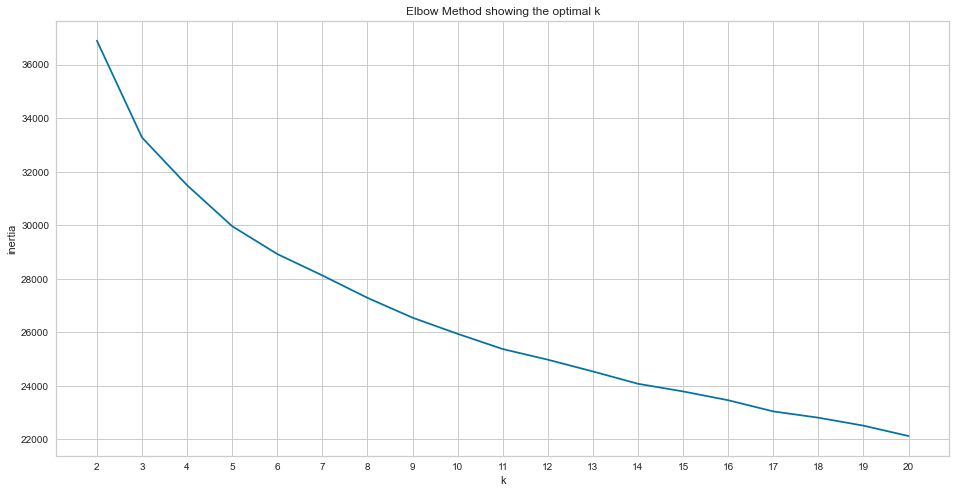

In [925]:
K = range(2, 21)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(df_scaled_df)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

### Silhouette method

Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

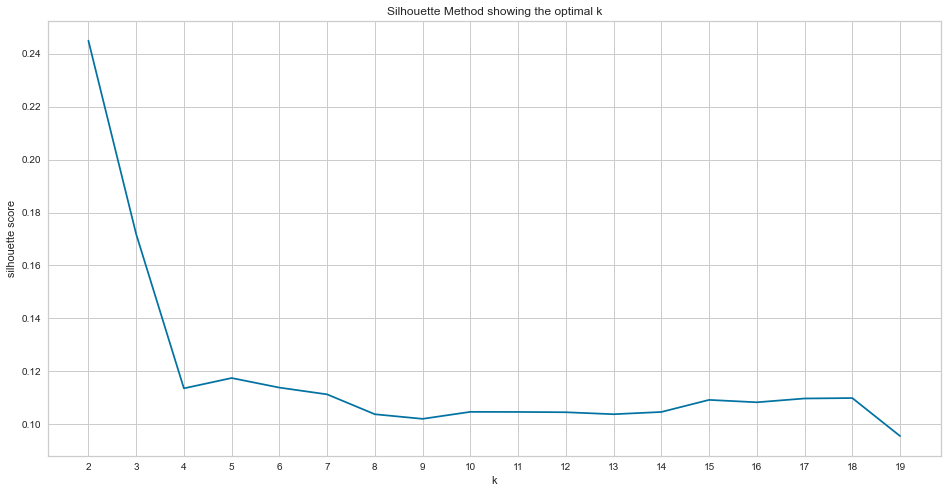

In [926]:
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(df_scaled_df)
    
   
    
    silhouette.append(silhouette_score(df_scaled_df, kmeans.predict(df_scaled_df)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Method showing the optimal k')

### visualize Silhouette

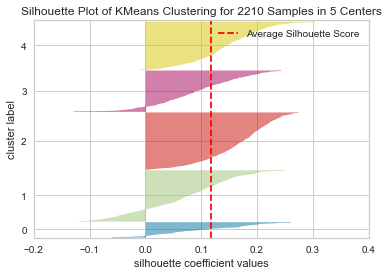

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 2210 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [927]:
#the optimal number of clusters is 5
model = KMeans(5, random_state=1234)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(df_scaled_df)        
visualizer.show()       

### Ninas Heatmap

In [928]:
#reset index
df = df.reset_index(drop=True)

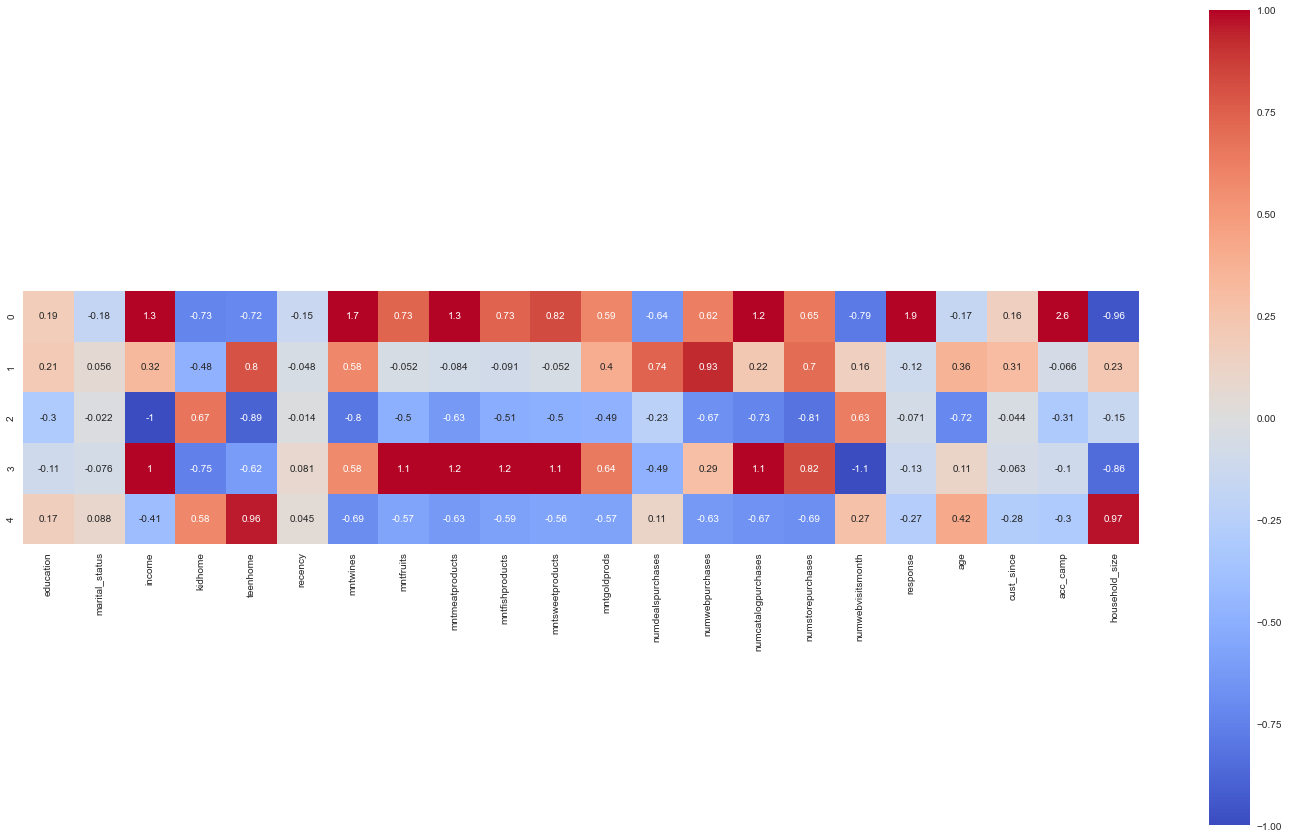

In [929]:
#create dictionary of cluster membership for each label
cluster_labels = np.unique(df.cluster)
cluster_members = {}
for clusters in cluster_labels:
    cluster_members[clusters] = np.where(df.cluster == clusters)

#for each cluster label (ky) calculate the mean for each feature
scaled_feature_means_by_cluster = pd.DataFrame([df_scaled_df.loc[cluster_members[ky]].mean(numeric_only=True) for ky in cluster_members.keys()])

#plot results as heatmap 
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(25, 15))
    ax = sns.heatmap(scaled_feature_means_by_cluster, cmap='coolwarm', vmin=-1, vmax=1, annot=True, square=True)


## Describing + plotting Clusters 

### Save df as excel file

In [930]:
df.to_excel(r'df_clean2.xlsx', index = False)

In [931]:
df.to_csv(r'df_clean2.csv', index = False)

### Create custom color palette for seaborn

In [932]:
#array with colours (dark blue: 000077, Blau: AEBBF4, light blue: BDF7FF, Lila: D8C1F1, red: F20C49, coral: F29188)
colors = ["#000077","#BDF7FF","#F20C49", "#D8C1F1", "#AEBBF4","#F29188"]
customPalette = sns.set_palette(sns.color_palette(colors))

## Features plotted by Clusters

### Education by Cluster

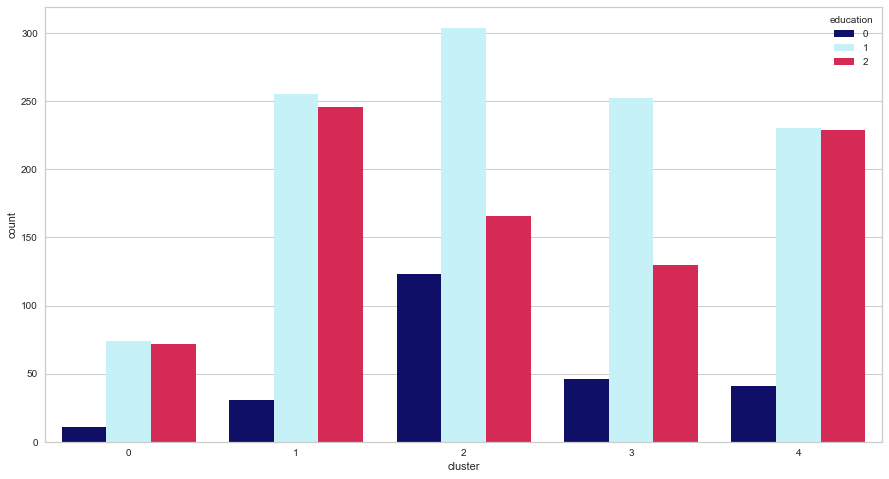

In [933]:
sns.set_palette(customPalette)
fig, ax = plt.subplots(figsize = (15,8))
ax = sns.countplot(x = df["cluster"],y = None, hue=df["education"], palette=sns.color_palette(customPalette, 3))

### Relationship Status by Cluster

Text(0.5, 1.0, 'Relationship Status by Cluster')

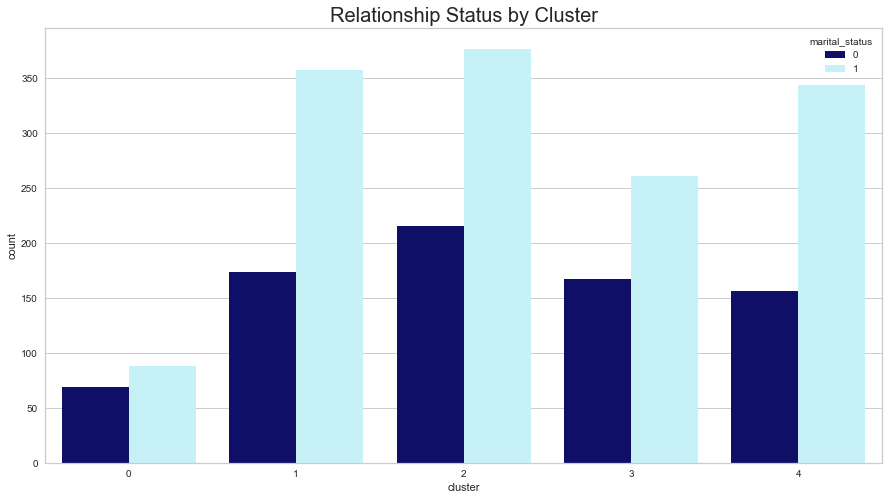

In [934]:
sns.set_palette(customPalette)
fig, ax = plt.subplots(figsize = (15,8))
ax = sns.countplot(x = df["cluster"],y = None, hue=df["marital_status"], palette=sns.color_palette(customPalette, 2))
plt.title('Relationship Status by Cluster', fontsize=20)

### Income by Cluster

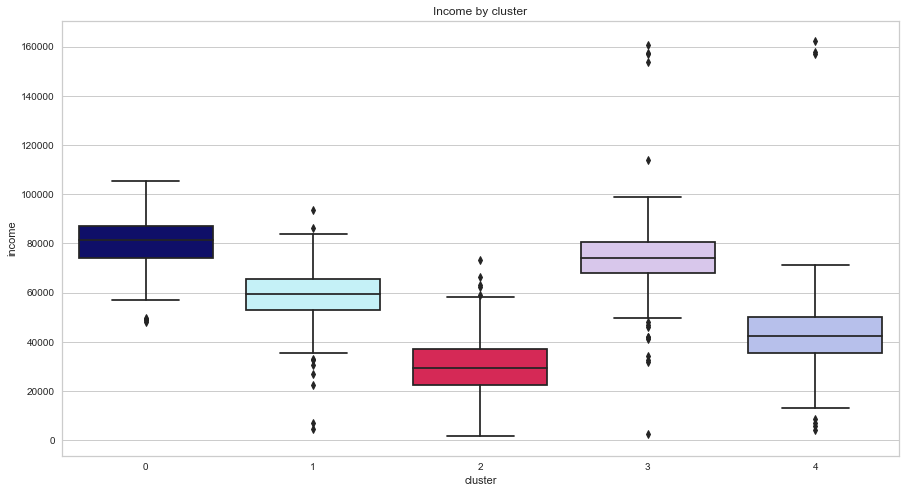

In [935]:
sns.set_palette(customPalette)
plt.figure(figsize=(15,8))
pl=sns.boxplot(y=df["income"],x=df["cluster"], palette=sns.color_palette(customPalette, 6))
pl.set_title("Income by cluster")
plt.show()

### Children by Cluster

<Figure size 1440x1440 with 0 Axes>

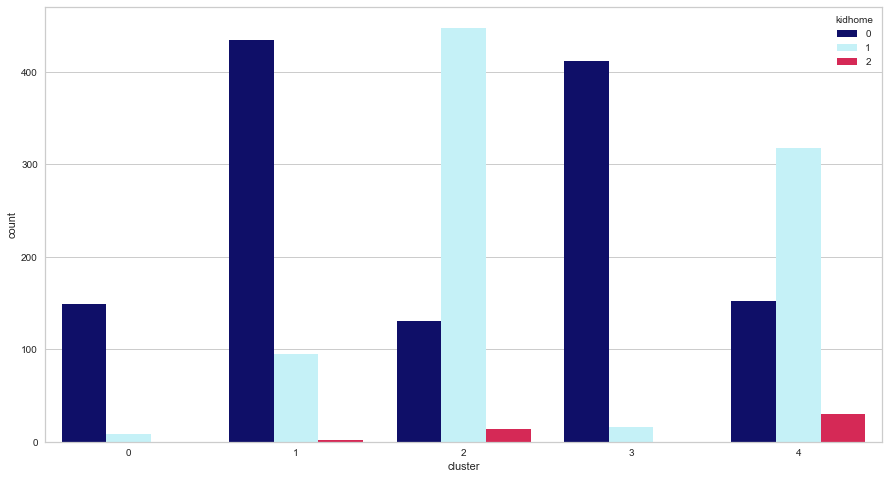

<Figure size 1440x1440 with 0 Axes>

In [936]:
sns.set_palette(customPalette)
fig, ax = plt.subplots(figsize = (15,8))
ax = sns.countplot(x = df["cluster"],y = None, hue=df["kidhome"], palette=sns.color_palette(customPalette, 3))
plt.figure(figsize=(20,20))

### Teenagers by Cluster

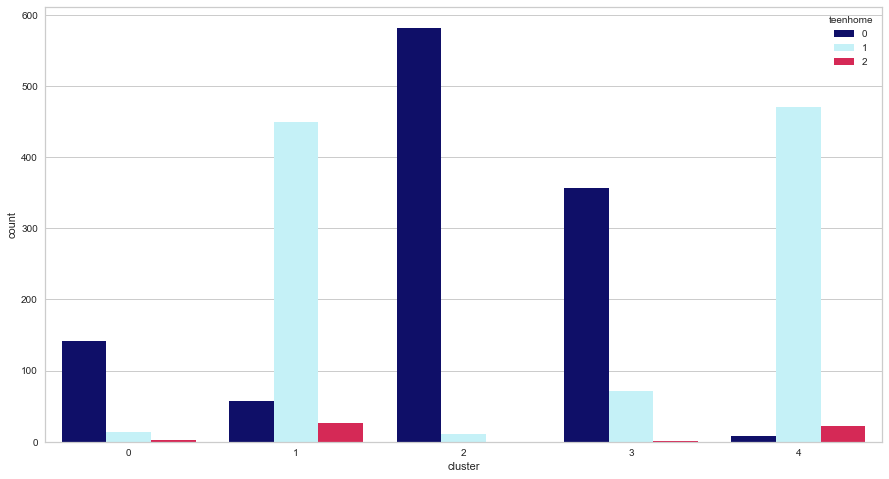

In [937]:
sns.set_palette(customPalette)
fig, ax = plt.subplots(figsize = (15,8))
ax = sns.countplot(x = df["cluster"],y = None, hue=df["teenhome"], palette=sns.color_palette(customPalette, 3))

### Recency by Cluster

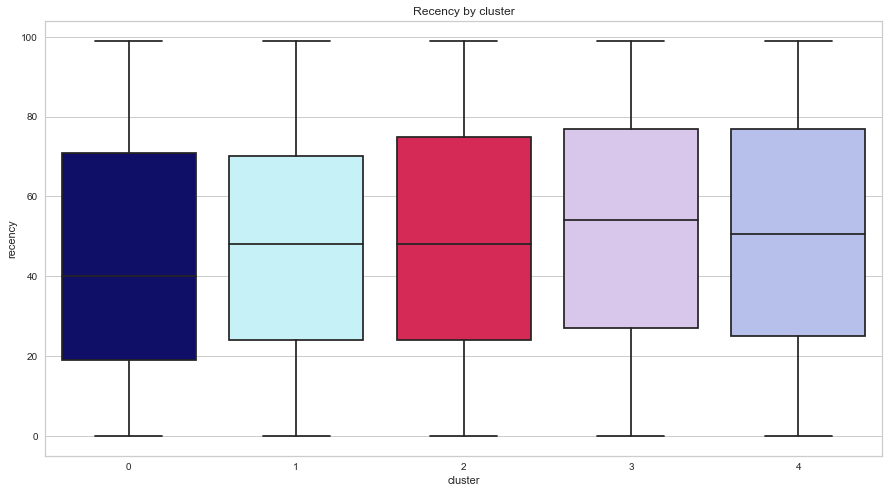

In [938]:
sns.set_palette(customPalette)
plt.figure(figsize=(15,8))
pl=sns.boxplot(y=df["recency"],x=df["cluster"], palette=sns.color_palette(customPalette, 6))
pl.set_title("Recency by cluster")
plt.show()

plt.figure(figsize=(15,8))
pl=sns.boxenplot(x=df["cluster"], y=df["total_spent"], palette=customPalette)
pl.set_xlabel("Total spent distribution by Cluster")
plt.show()

### Wines by Cluster

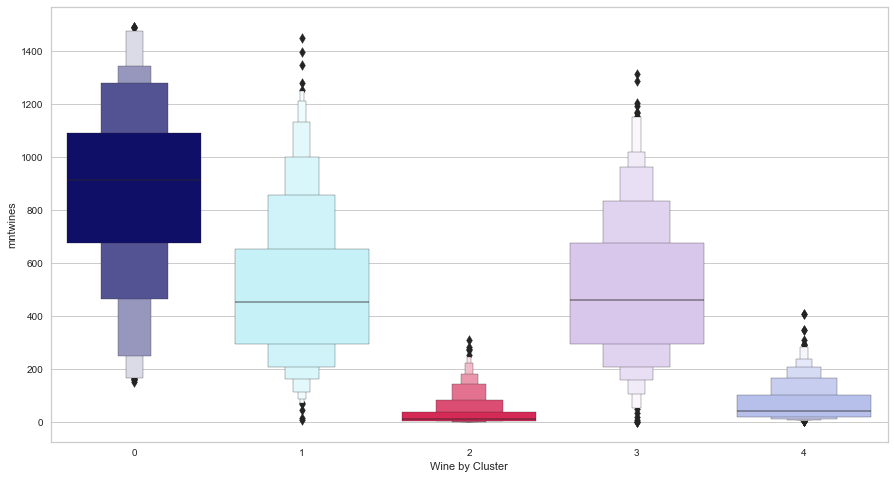

In [939]:
plt.figure(figsize=(15,8))
pl=sns.boxenplot(x=df["cluster"], y=df["mntwines"], palette=customPalette)
pl.set_xlabel("Wine by Cluster")
plt.show()

### Fruit by Cluster

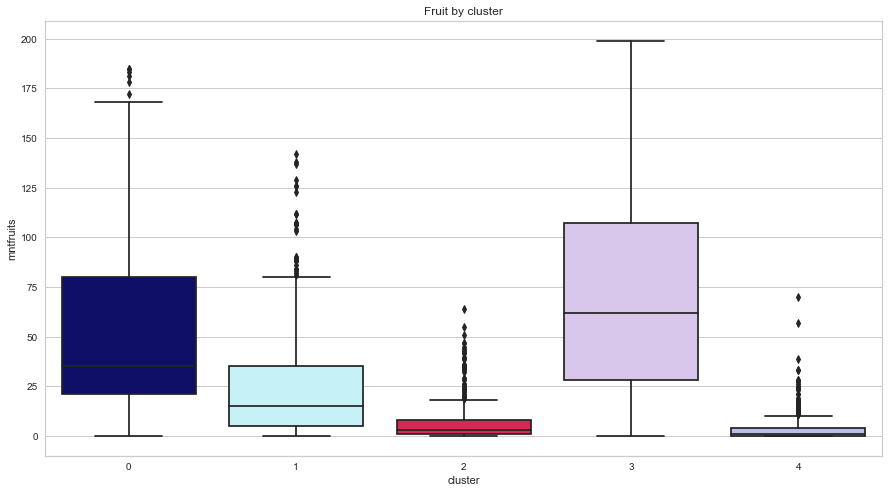

In [940]:
sns.set_palette(customPalette)
plt.figure(figsize=(15,8))
pl=sns.boxplot(y=df["mntfruits"],x=df["cluster"], palette=sns.color_palette(customPalette, 6))
pl.set_title("Fruit by cluster")
plt.show()

### Meat products by Cluster

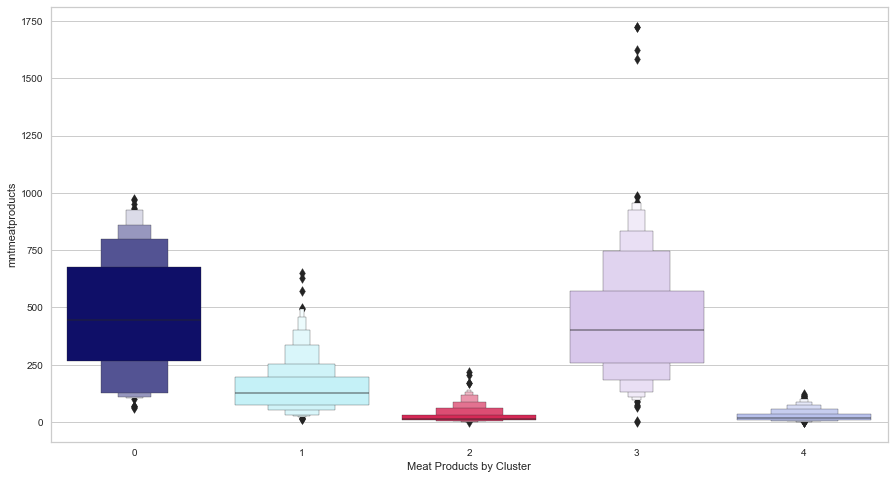

In [941]:
sns.set_palette(customPalette)
plt.figure(figsize=(15,8))
pl=sns.boxenplot(x=df["cluster"], y=df["mntmeatproducts"], palette=customPalette)
pl.set_xlabel("Meat Products by Cluster")
plt.show()

### Fish Products by Cluster

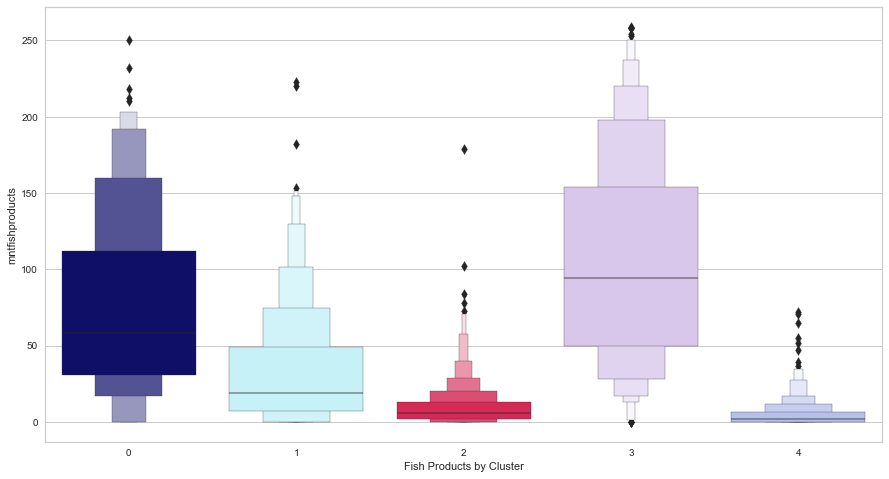

In [942]:
sns.set_palette(customPalette)
plt.figure(figsize=(15,8))
pl=sns.boxenplot(x=df["cluster"], y=df["mntfishproducts"], palette=customPalette)
pl.set_xlabel("Fish Products by Cluster")
plt.show()

### Sweet Products by Cluster

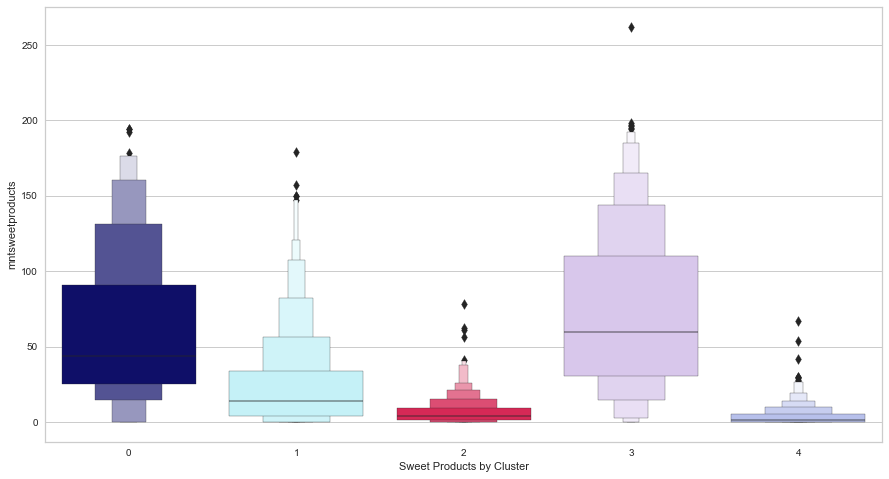

In [943]:
sns.set_palette(customPalette)
plt.figure(figsize=(15,8))
pl=sns.boxenplot(x=df["cluster"], y=df["mntsweetproducts"], palette=customPalette)
pl.set_xlabel("Sweet Products by Cluster")
plt.show()

### Gold Products by Cluster

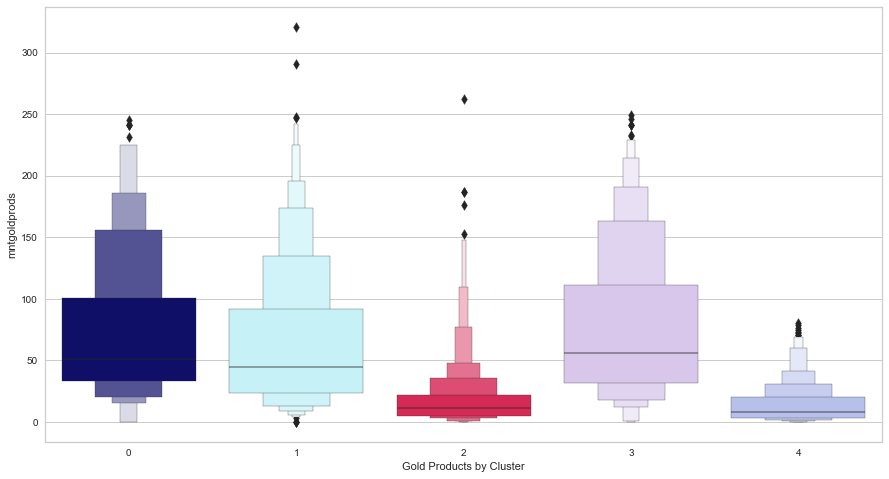

In [944]:
sns.set_palette(customPalette)
plt.figure(figsize=(15,8))
pl=sns.boxenplot(x=df["cluster"], y=df["mntgoldprods"], palette=customPalette)
pl.set_xlabel("Gold Products by Cluster")
plt.show()

### Number of Deals purchased by Cluster

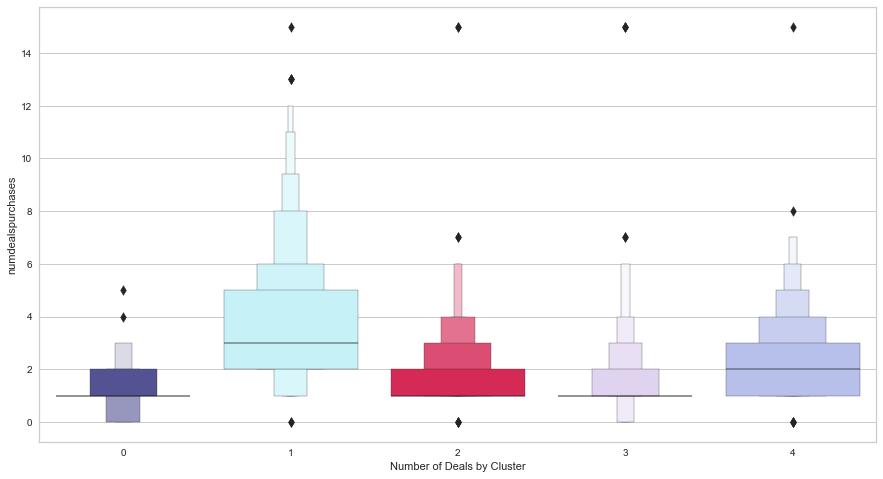

In [945]:
sns.set_palette(customPalette)
plt.figure(figsize=(15,8))
pl=sns.boxenplot(x=df["cluster"], y=df["numdealspurchases"], palette=customPalette)
pl.set_xlabel("Number of Deals by Cluster")
plt.show()

### Number of Web Purchases by Cluster

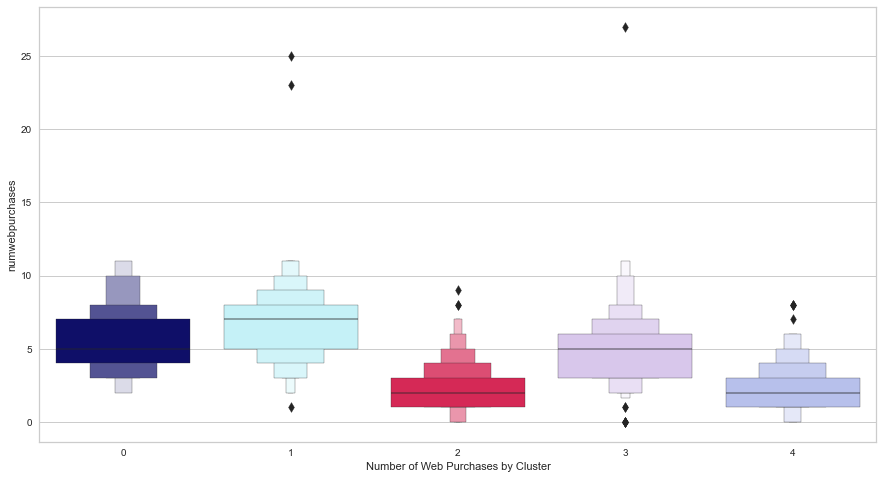

In [946]:
sns.set_palette(customPalette)
plt.figure(figsize=(15,8))
pl=sns.boxenplot(x=df["cluster"], y=df["numwebpurchases"], palette=customPalette)
pl.set_xlabel("Number of Web Purchases by Cluster")
plt.show()

### Number of Catalogue Purchases by Cluster

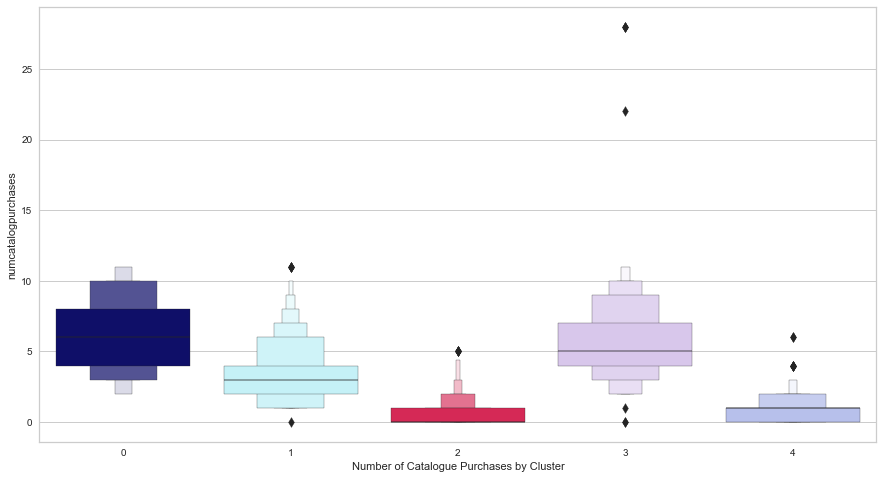

In [947]:
sns.set_palette(customPalette)
plt.figure(figsize=(15,8))
pl=sns.boxenplot(x=df["cluster"], y=df["numcatalogpurchases"], palette=customPalette)
pl.set_xlabel("Number of Catalogue Purchases by Cluster")
plt.show()

### Number of Store Purchases by Cluster

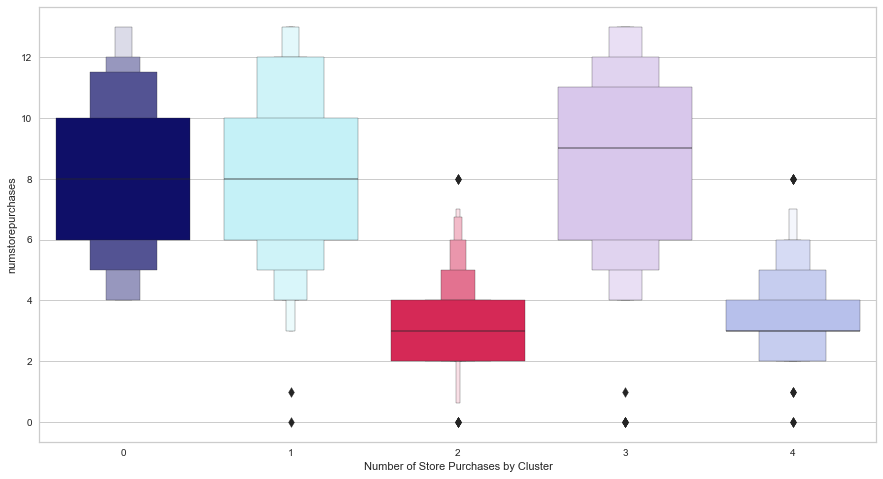

In [948]:
sns.set_palette(customPalette)
plt.figure(figsize=(15,8))
pl=sns.boxenplot(x=df["cluster"], y=df["numstorepurchases"], palette=customPalette)
pl.set_xlabel("Number of Store Purchases by Cluster")
plt.show()

### Web Visits by Cluster

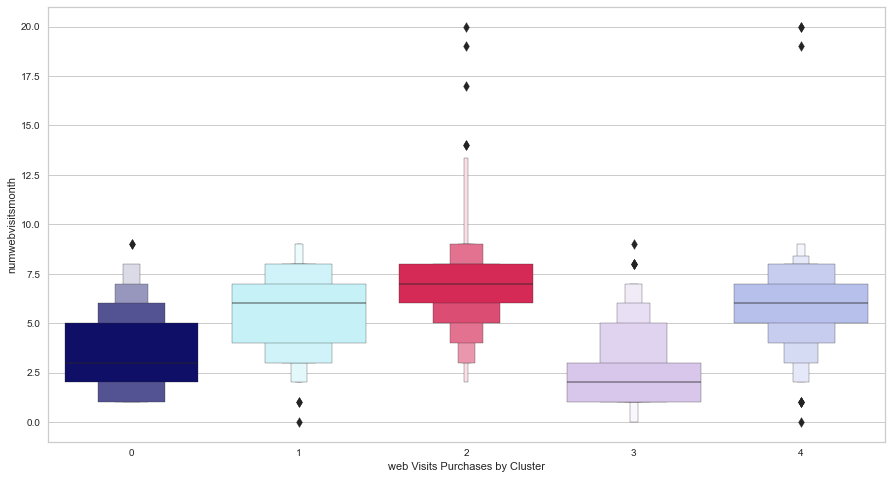

In [949]:
sns.set_palette(customPalette)
plt.figure(figsize=(15,8))
pl=sns.boxenplot(x=df["cluster"], y=df["numwebvisitsmonth"], palette=customPalette)
pl.set_xlabel("web Visits Purchases by Cluster")
plt.show()

### Response by Cluster

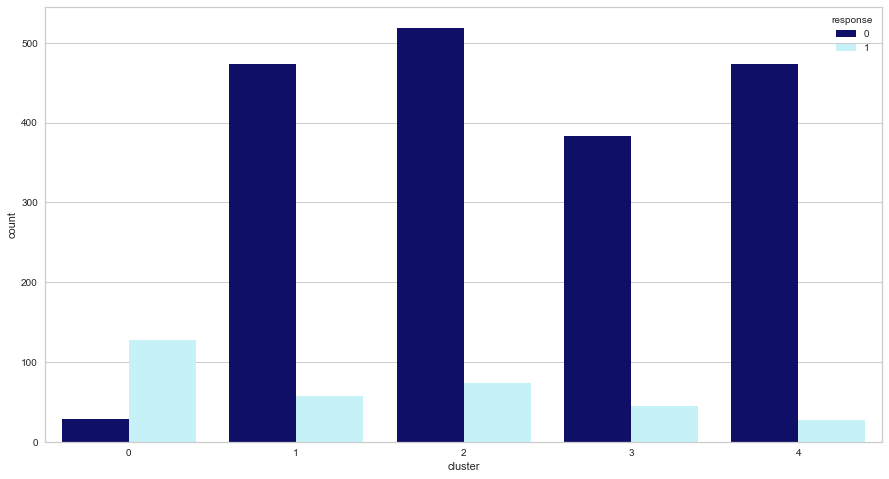

In [950]:
#Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
sns.set_palette(customPalette)
fig, ax = plt.subplots(figsize = (15,8))
ax = sns.countplot(x = df["cluster"],y = None, hue=df["response"], palette=sns.color_palette(customPalette, 2))

### Age by Cluster

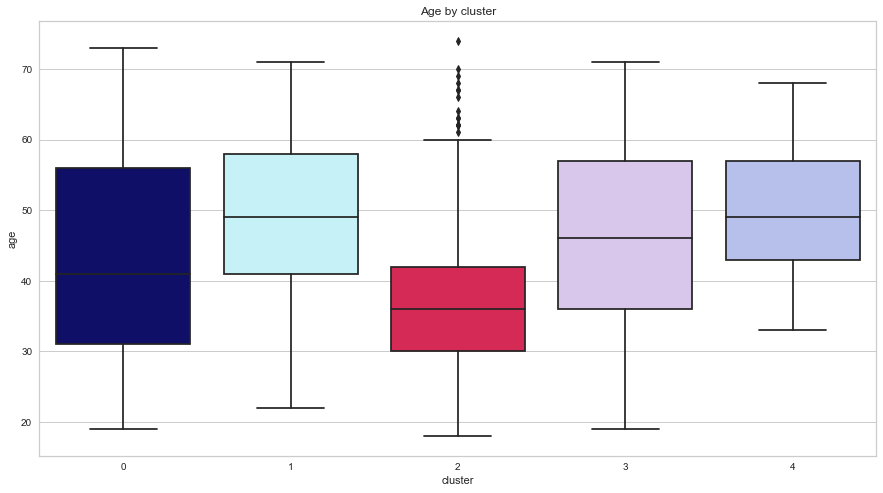

In [951]:
sns.set_palette(customPalette)
plt.figure(figsize=(15,8))
pl=sns.boxplot(y=df["age"],x=df["cluster"], palette=sns.color_palette(customPalette, 6))
pl.set_title("Age by cluster")
plt.show()

### Accepted Campaigns by Cluster

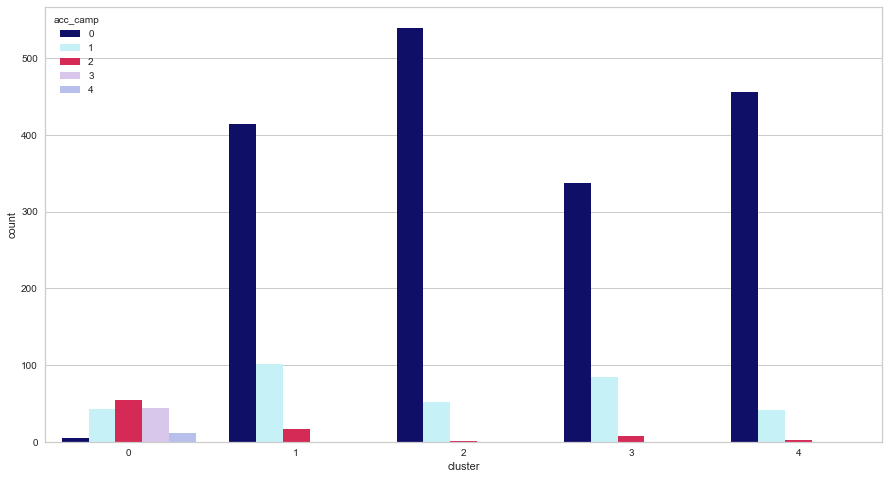

In [952]:
sns.set_palette(customPalette)
fig, ax = plt.subplots(figsize = (15,8))
ax = sns.countplot(x = df["cluster"],y = None, hue=df["acc_camp"],palette=sns.color_palette(customPalette, 5))

### Household Size by Cluster

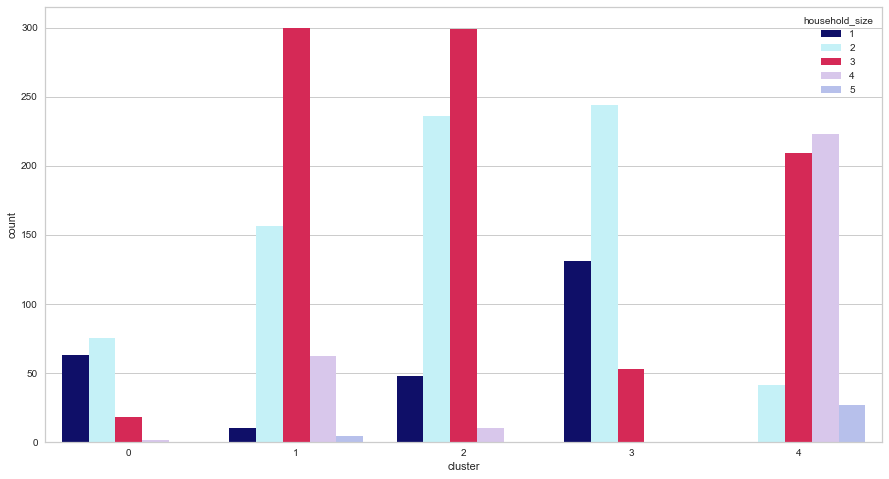

In [953]:
sns.set_palette(customPalette)
fig, ax = plt.subplots(figsize = (15,8))
ax = sns.countplot(x = df["cluster"],y = None, hue=df["household_size"], palette=sns.color_palette(customPalette, 6))

### Customer_since by Cluster

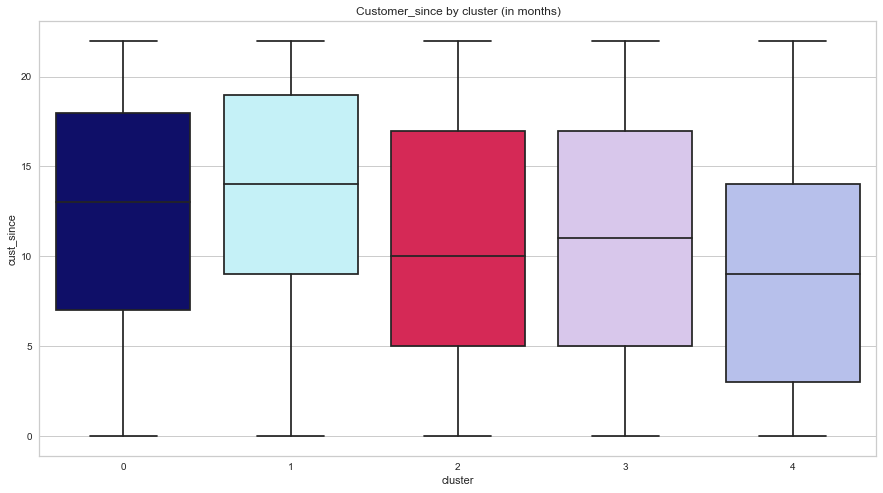

In [954]:
sns.set_palette(customPalette)
plt.figure(figsize=(15,8))
pl=sns.boxplot(y=df["cust_since"],x=df["cluster"], palette=sns.color_palette(customPalette, 6))
pl.set_title("Customer_since by cluster (in months)")
plt.show()

## Plotting features against each other 

### Wines by Education

<AxesSubplot:xlabel='education', ylabel='mntwines'>

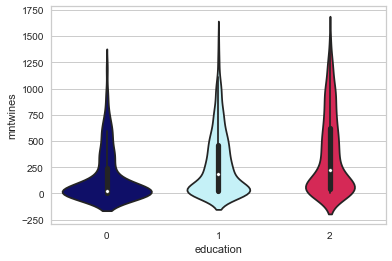

In [955]:
sns.set_palette(customPalette)
sns.violinplot(x="education", y="mntwines", data=df, palette=sns.color_palette(customPalette, 3))

### Wines by Children

<AxesSubplot:xlabel='kidhome', ylabel='mntwines'>

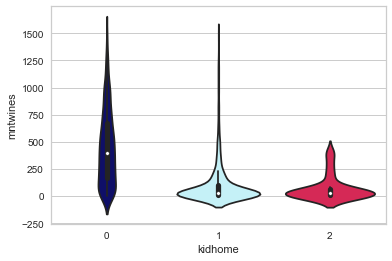

In [956]:
sns.set_palette(customPalette)
sns.violinplot(x="kidhome", y="mntwines", data=df, palette=sns.color_palette(customPalette, 3))

### Wines by Teenager

<AxesSubplot:xlabel='teenhome', ylabel='mntwines'>

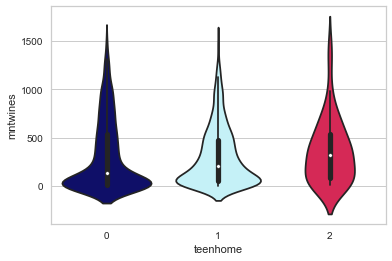

In [957]:
sns.set_palette(customPalette)
sns.violinplot(x="teenhome", y="mntwines", data=df, palette=sns.color_palette(customPalette, 3))

### Meat Products by Education

<AxesSubplot:xlabel='education', ylabel='mntmeatproducts'>

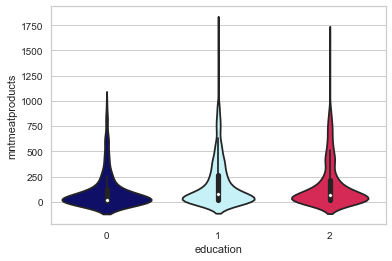

In [958]:
sns.set_palette(customPalette)
sns.violinplot(x="education", y="mntmeatproducts", data=df, palette=sns.color_palette(customPalette, 3))

### Fish Products by Education

<AxesSubplot:xlabel='education', ylabel='mntfishproducts'>

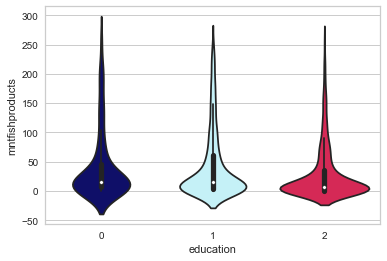

In [959]:
sns.set_palette(customPalette)
sns.violinplot(x="education", y="mntfishproducts", data=df, palette=sns.color_palette(customPalette, 3))

## RFM Analysis

RFM modelling is a marketing analysis technique used to assess customer value. The RFM model is based on three factors:
- Recency = the interval between the last action and today
- Frequency = the number of actions between the user’s signup date and today
- Monetary value = the sum of revenue within the user’s lifetime

### create new df and columns for RFM

In [960]:
#create frequency column
df["frequency"] = df["numcatalogpurchases"] + df["numstorepurchases"] + df["numwebpurchases"]
df["frequency"]

0       22
1        4
2       20
3        6
4       14
        ..
2205    16
2206    15
2207    18
2208    21
2209     8
Name: frequency, Length: 2210, dtype: int64

In [961]:
#create monetary column
df["monetary"] = df["mntwines"]+ df["mntfruits"]+ df["mntmeatproducts"]+ df["mntfishproducts"]+ df["mntsweetproducts"]+ df["mntgoldprods"]

In [962]:
#create new df 
rfm_df = df.filter(['recency','frequency','monetary', "cluster"], axis=1)

In [1021]:
rfm_df['recency'] = rfm_df['recency'].astype(int)
rfm_df['frequency'] = rfm_df['frequency'].astype(int)
rfm_df['monetary'] = rfm_df['monetary'].astype(int)

To segment the customer groups we will use quartiles and assign scores from 1 to 4 to "recency", "frequency" and "monetary", with 4 being the highest score.

### get Quartiles

#calculate quartiles
quartiles = rfm_df.quantile([0.25, 0.5, 0.75])

#save quartiles in dictionary
quartiles.to_dict()

#Recency Score (x = value, p = recency, monetary_value, frequency, q = quartiles dict)
def rscore(x,p,q):
    if x <= q[p][0.25]:
        return 4
    elif x <= q[p][0.50]:
        return 3
    elif x <= q[p][0.75]: 
        return 2
    else:
        return 1

#Frequency + Monetary Score
def fmscore(x,p,q):
    if x <= q[p][0.25]:
        return 1
    elif x <= q[p][0.50]:
        return 2
    elif x <= q[p][0.75]: 
        return 3
    else:
        return 4

- Recency score = 1: most recent purchase
- Frequency score = 1: most frequently purchased
- Monetary score = 1: highest amount of money spent

### RFM segmentation table

In [1022]:
#combine scores to create a single score 
rfm_df['r_quartile'] = pd.qcut(rfm_df['recency'], 4, ['1','2','3','4'])
rfm_df['f_quartile'] = pd.qcut(rfm_df['frequency'], 4, ['4','3','2','1'])
rfm_df['m_quartile'] = pd.qcut(rfm_df['monetary'], 4, ['4','3','2','1'])

In [1024]:
#create segmentation table
rfm_df['rfmscore'] = rfm_df.r_quartile.astype(str)+ rfm_df.f_quartile.astype(str) + rfm_df.m_quartile.astype(str)
rfm_df.head()

,recency,frequency,monetary,cluster,r_quartile,f_quartile,m_quartile,rfmscore
0,58,22,1617,3,3,1,1,311
1,38,4,27,4,2,4,4,244
2,26,20,776,3,2,1,2,212
3,26,6,53,2,2,4,4,244
4,94,14,422,2,4,2,2,422


In [1038]:
#show top customers
rfm_df[rfm_df['rfmscore']=='111'].sort_values('monetary', ascending=False).head()

,recency,frequency,monetary,cluster,r_quartile,f_quartile,m_quartile,rfmscore
1438,16,25,2349,0,1,1,1,111
474,11,19,2092,3,1,1,1,111
1933,2,22,2092,0,1,1,1,111
1652,20,21,2091,0,1,1,1,111
1068,16,19,2087,0,1,1,1,111


In [1050]:
#show most frequent rfmscore by cluster
rfm_df.groupby(['cluster'])['rfmscore'].agg(pd.Series.mode)

cluster
0    111
1    222
2    244
3    411
4    444
Name: rfmscore, dtype: object

Here we can see that cluster 0 are our top customers, followed by clusters 1 and 3.

In [1026]:
rfm_df.sort_values(by=['frequency', 'recency'], ascending=[True, False])

,recency,frequency,monetary,cluster,r_quartile,f_quartile,m_quartile,rfmscore
2106,85,0,8,4,4,4,4,444
639,81,0,6,3,4,4,4,444
1229,65,0,8,2,3,4,4,344
1504,56,0,5,2,3,4,4,344
1826,29,0,9,4,2,4,4,244
...,...,...,...,...,...,...,...,...
620,72,31,1375,3,3,1,1,311
62,19,31,1274,0,1,1,1,111
1236,97,32,1529,0,4,1,1,411
1649,97,32,1529,0,4,1,1,411


In [1027]:
rfm_df[rfm_df['rfmscore']=='111'].sort_values('monetary', ascending=False).head()

,recency,frequency,monetary,cluster,r_quartile,f_quartile,m_quartile,rfmscore
1438,16,25,2349,0,1,1,1,111
474,11,19,2092,3,1,1,1,111
1933,2,22,2092,0,1,1,1,111
1652,20,21,2091,0,1,1,1,111
1068,16,19,2087,0,1,1,1,111


In [1028]:
max(rfm_df["rfmscore"])

'444'

In [1029]:
min(rfm_df['rfmscore'])

'111'

In [1030]:
rfm_df['rfmscore'].dtypes

dtype('O')

In [1031]:
rfm_df.groupby('rfmscore').agg('monetary').mean()

rfmscore
111    1496.864865
112     843.181818
113     318.000000
121    1432.054545
122     579.014925
123     380.250000
131    1581.000000
132     653.833333
133     214.604396
134      58.600000
143      92.468085
144      37.880597
211    1525.905882
212     880.276596
221    1480.333333
222     592.792208
223     381.571429
231    1605.000000
232     643.857143
233     213.202247
234      60.000000
243      89.793103
244      39.743421
311    1488.851852
312     884.321429
321    1444.396552
322     631.560000
323     380.833333
331    1625.166667
332     709.714286
333     226.523256
334      58.250000
343      93.644444
344      37.100917
411    1551.666667
412     825.134615
421    1429.727273
422     640.725806
423     370.333333
431    1466.666667
432     731.500000
433     209.154762
434      51.833333
443      93.717391
444      40.780142
Name: monetary, dtype: float64

In [1032]:
rfm_df.groupby('rfmscore').agg('recency').mean()

rfmscore
111    12.459459
112    12.000000
113     4.500000
121     8.545455
122    12.283582
123     8.125000
131    14.000000
132    13.833333
133    12.032967
134    11.000000
143    10.340426
144    12.350746
211    36.694118
212    37.297872
221    35.647059
222    36.298701
223    32.857143
231    37.500000
232    35.571429
233    36.595506
234    41.250000
243    37.379310
244    37.486842
311    61.666667
312    61.267857
321    63.000000
322    62.160000
323    56.833333
331    67.666667
332    66.285714
333    63.139535
334    55.875000
343    59.555556
344    61.440367
411    87.922222
412    86.230769
421    85.750000
422    88.693548
423    91.666667
431    87.000000
432    87.666667
433    87.309524
434    89.666667
443    85.978261
444    85.751773
Name: recency, dtype: float64

### Label Customer Groups

We created labels for the customer groups according to their rfm scores; so customers with the overall highest scores are "top customers", customers with the highest score for frequency are the most "loyal customers" and customers with the highest monetary scores are "big spenders". 

Customers with the lowest rfm score are "lost" customers.

In [1033]:
print("top customers: ",len(rfm_df[rfm_df['rfmscore']=='444']))
print("loyal customers: ",len(rfm_df[rfm_df['f_quartile']==4]))
print("big spenders: ",len(rfm_df[rfm_df['m_quartile']==4]))
print("new customers: ", len(rfm_df[rfm_df['rfmscore']=='411']))
print("almost lost: ",len(rfm_df[rfm_df['rfmscore']=='144']))
print("lost: ",len(rfm_df[rfm_df['rfmscore']=='111']))

top customers:  141
loyal customers:  0
big spenders:  0
new customers:  90
almost lost:  134
lost:  74


In [1034]:
#compare customer groups generated by RFM analysis to k-means clusters 
rfm_df["cluster"].value_counts()

2    593
1    532
4    500
3    428
0    157
Name: cluster, dtype: int64

## Plot RFM Elements by Cluster

We used the features generated during the RFM analysis to sort our clusters and validate our previous findings.
Here we can see that there are 3 clusters (0,1 and 3) that stand out, so future advertising camapaigns should be directed towards them. 

### Recency by Cluster

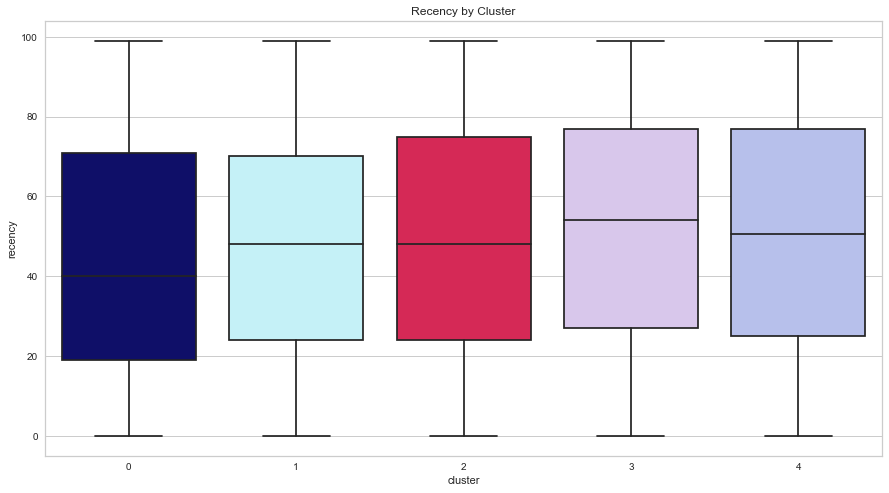

In [1001]:
plt.figure(figsize=(15,8))
pl=sns.boxplot(x=df["cluster"], y=rfm_df["recency"])
pl.set_title("Recency by Cluster")
plt.show() 

### Frequency by Cluster

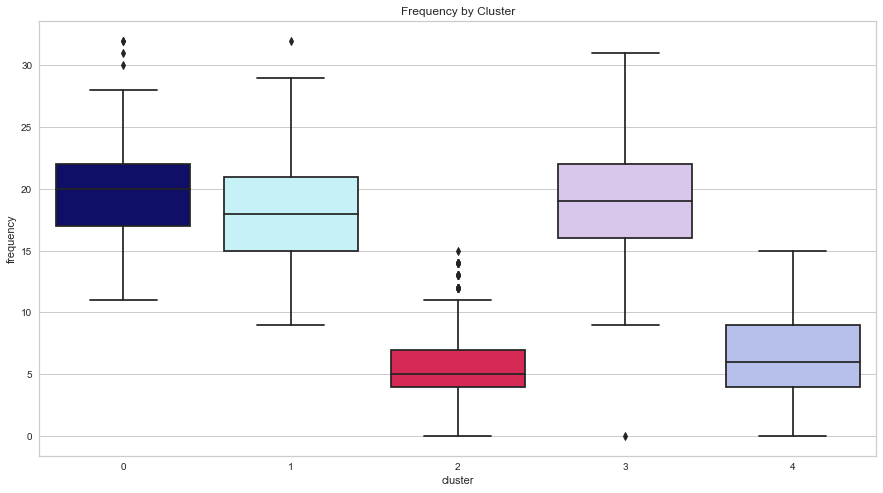

In [1002]:
plt.figure(figsize=(15,8))
pl=sns.boxplot(x=df["cluster"], y=rfm_df["frequency"])
pl.set_title("Frequency by Cluster")
plt.show() 

### Monetary by Cluster

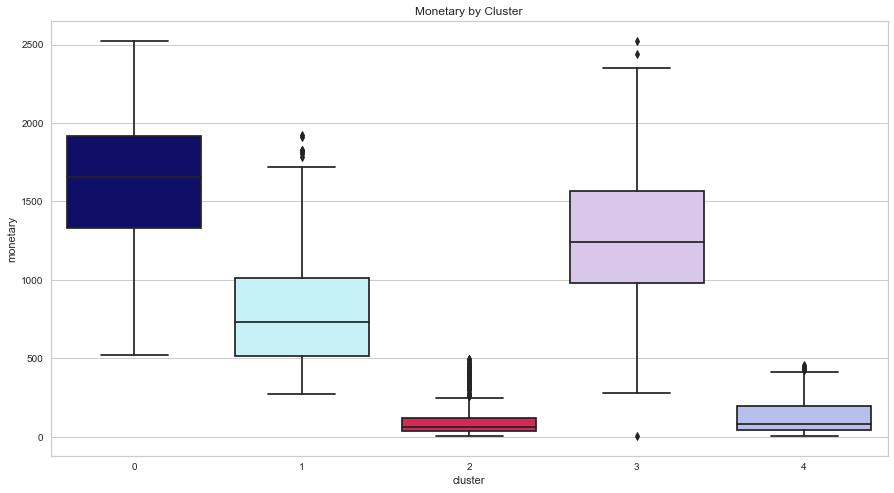

In [1003]:
plt.figure(figsize=(15,8))
pl=sns.boxplot(x=df["cluster"], y=rfm_df["monetary"])
pl.set_title("Monetary by Cluster")
plt.show() 